<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Logistic_regression_prac_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

!ls "/content/drive/My Drive/Machine Learning/Lazy Programmer/LP_Machine_learning/machine_learning_examples/ann_logistic_extra"


ann_predict.py	    __init__.py		       logistic_train.py
ann_train.py	    logistic_predict.py        process.py
ecommerce_data.csv  logistic_softmax_train.py  __pycache__


In [ ]:
!cat '/content/drive/My Drive/Machine Learning/Lazy Programmer/LP_Machine_learning/machine_learning_examples/ann_logistic_extra/process.py'


from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import pandas as pd
import os

# so scripts from other folders can import this file
dir_path = os.path.abspath(os.path.dirname(os.path.realpath(__file__)))

# normalize numerical columns
# one-hot categorical columns

def get_data():
  df = pd.read_csv(dir_path + '/ecommerce_data.csv')

  # just in case you're curious what's in it
  # df.head()

  # easier to work with numpy array
  data = df.values

  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1]
  Y = data[:,-1].astype(np.int32)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1

  # method 2
  # 

In [ ]:
!python '/content/drive/My Drive/Machine Learning/Lazy Programmer/LP_Machine_learning/machine_learning_examples/ann_logistic_extra/process.py'

In [ ]:
print(get_binary_data)
import sys
sys.path.append('/content/drive/My Drive/Machine Learning/Lazy Programmer/LP_Machine_learning/machine_learning_examples/ann_logistic_extra')

<function get_binary_data at 0x7ff15c53bc80>


In [ ]:
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()

In [ ]:
from sklearn.utils import shuffle

In [ ]:
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0

In [ ]:
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [ ]:
def forward(X, W, b):
  return sigmoid(X.dot(W) + b)

In [ ]:
def classification_rate(Y, P):
  return np.mean(Y == P)

In [ ]:
def cross_entropy(T, pY):
  return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

0 1.4040519488853263 1.4778996372597746
1000 0.19353292081769524 0.14636139199282586
2000 0.192960911791888 0.14429805962883938
3000 0.1929338566002531 0.14393415193613485
4000 0.19293234720133642 0.14385282536249136
5000 0.19293225994105676 0.14383356181164444
6000 0.19293225485395898 0.14382892907992312
7000 0.19293225455679405 0.14382781055234928
8000 0.192932254539426 0.14382754022071698
9000 0.19293225453841115 0.14382747486846242
Final train classification_rate: 0.9717868338557993
Final test classification_rate: 0.9746835443037974


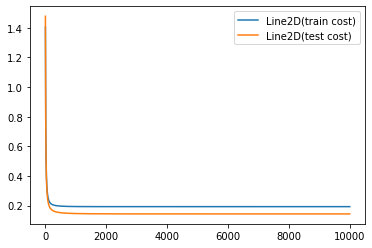

In [ ]:
train_costs = []
test_costs = []

learning_rate = 0.001

for i in range(10000):
  # forward propagation
  pYtrain = forward(Xtrain, W, b)
  pYtest = forward(Xtest, W, b)

  #calculate loss
  ctrain = cross_entropy(Ytrain, pYtrain)
  ctest = cross_entropy(Ytest, pYtest)
  train_costs.append(ctrain)
  test_costs.append(ctest)

  # calculate weights and bias
  W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
  b -= learning_rate*(pYtrain - Ytrain).sum()

  if i % 1000 == 0:
    print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])